<a href="https://colab.research.google.com/github/muhsufyan/big-data-tools/blob/main/spark_dasar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz

In [ ]:
!tar xf spark-3.1.2-bin-hadoop3.2.tgz

In [ ]:
!pip install -q findspark

In [ ]:
!pip install pyspark

     |████████████████████████████████| 212.4 MB 68 kB/s 
     |████████████████████████████████| 198 kB 56.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=49d02035b9697e4941906facfaa0da9dc9716c31f1695c2a01d5d5d614de5555
  Stored in directory: /root/.cache/pip/wheels/a5/0a/c1/9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark


In [ ]:
from pyspark import SparkContext
# inisialisasi context
sc = SparkContext()
# buat data
a = sc.parallelize([1,2,3,4])

In [ ]:
# lihat data
a.collect()

[1, 2, 3, 4]

In [ ]:
# coba buat context baru
sc2 = SparkContext()

ValueError: ignored

error. kita harus menghentikan (stop) dulu context sblmnya

In [ ]:
sc.stop()

In [ ]:
# coba buat context baru
sc2 = SparkContext()

***NOTE HANYA BERLAKU DI LOCAL (COLAB TIDAK JALAN)***

kita dpt melihat spark dlm GUI dg mengetikkan localhost:4040 misalnya atau localhost:xx dari sana kita dpt melakukan debug, melihat job, memori yg digunakan, sql

# SparkContext => RDD

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark

     |████████████████████████████████| 212.4 MB 60 kB/s 
     |████████████████████████████████| 198 kB 56.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=4ba8a0faf2d72002de540400f0528c4dcdc3668b03eb0f2a6fc182fd85e76432
  Stored in directory: /root/.cache/pip/wheels/a5/0a/c1/9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark


SparkContext : main entry point untuk fungsionalitas spark. untuk dpt menjlnkan fungsionalitas spark maka harus terlbh dahulu inisialisasi SparkContext, ini sprti fungsi main pd java,c, dll. merepresentasikan koneksi ke spark cluster, SparkContext digunakan untuk membuat RDD, accumulator, & broadcast variable pd cluster. untuk menghentikan SparkContext gunakan stop(). jd untuk membuat RDD, dataframe gunakan SparkContext

sedangkan untuk membuat spark SQL gunakan SparkSession

In [ ]:
from pyspark import SparkConf, SparkContext
# buat config, sbnrnya kita bisa langsung di SparkContext tp kita akan gunakan config
conf = SparkConf(). setAppName("rdd 1").setMaster("local")
sc = SparkContext(conf=conf)

In [ ]:
# lihat configurasi
sc.getConf().getAll()

[('spark.master', 'local'),
 ('spark.driver.host', '4c3d5b218612'),
 ('spark.rdd.compress', 'True'),
 ('spark.app.startTime', '1630290083386'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.app.name', 'rdd 1'),
 ('spark.submit.pyFiles', ''),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.driver.port', '38861'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.app.id', 'local-1630290084605')]

In [ ]:
sc.stop()

In [ ]:
# kita buat SparkContext langsung
from pyspark import SparkContext
sc = SparkContext("local","rdd 2")

In [ ]:
sc.getConf().getAll()

[('spark.master', 'local'),
 ('spark.driver.host', '4c3d5b218612'),
 ('spark.rdd.compress', 'True'),
 ('spark.app.name', 'rdd 2'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.submit.pyFiles', ''),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.app.id', 'local-1630290216208'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.driver.port', '37033'),
 ('spark.app.startTime', '1630290216033')]

RDD : kumpulan dari objek yg terdistribusi bersifat immutable. setiap RDD dibagi kedlm beberapa partisi, proses computasi dilakukan disetiap node dari cluster yg berbeda"

RDD dibuat dg 2 cara 
1. load dataset dg eksternal
2. tranformasi sebuah RDD ke RDD lainnya.


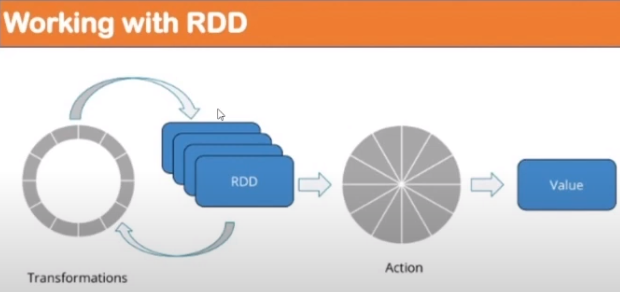

data preparation dilakukan di transformation dan action

transformation : membuat RDD baru
action : jika kita menerapkan action maka akan menghasilkan value

[tambahan bacaan untuk mengetahui transformation & action](http://malifauzi.lecture.ub.ac.id/files/2019/02/Spark.pdf)

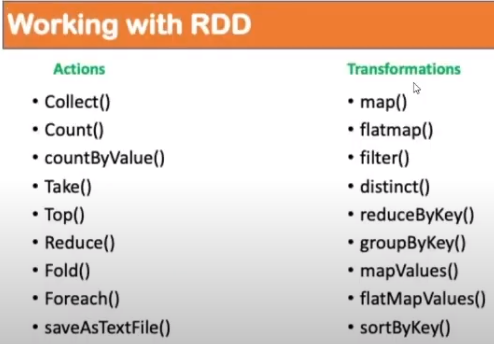

[fungsi pd transformasi dan action](https://spark.apache.org/docs/latest/rdd-programming-guide.html#transformations)

transformasi dibagi 2 : narrow dan wide. 

In [ ]:
# membuat rdd 
names = sc.parallelize(['Adam','Brian','Budi','Cucu','Dodo'])

In [ ]:
type(names)

pyspark.rdd.RDD

In [ ]:
# lihat semua rdd
names.collect()

['Adam', 'Brian', 'Budi', 'Cucu', 'Dodo']

In [ ]:
# lihat data berapa kali muncul
names.countByValue()

defaultdict(int, {'Adam': 1, 'Brian': 1, 'Budi': 1, 'Cucu': 1, 'Dodo': 1})

foreach termsk ke action, yg akan mengambil setiap elemen lalu menerapkan suatu fungsi (sprti loop array dan lakukan operasi pd array tsb tp operasinya dibungkus kedlm suatu fungsi). Contoh database / API pd setiap elemen RDD

In [ ]:
# misal kita ingin melakukan operasi fungsi f 
def f(x): print(x)
# kita lakukan operasi fungsi f dg foreach
loop = sc.parallelize([1,2,3,4,5]).foreach(lambda x: print(x))

In [ ]:
type(loop)

NoneType

hindari penggunakan collect() karena itu akan mengambil semua data sehingga memerlukan biaya yg mahal

In [ ]:
!wget https://raw.githubusercontent.com/mkuthan/example-spark/master/src/main/resources/data/employees.txt

--2021-08-30 02:53:12--  https://raw.githubusercontent.com/mkuthan/example-spark/master/src/main/resources/data/employees.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 318 [text/plain]
Saving to: ‘employees.txt’

employees.txt       100%[===================>]     318  --.-KB/s    in 0s      

2021-08-30 02:53:13 (15.6 MB/s) - ‘employees.txt’ saved [318/318]



In [ ]:
karyawan = sc.textFile('/content/employees.txt')

In [ ]:
type(karyawan)

pyspark.rdd.RDD

In [ ]:
karyawan.collect()

['123234877,Michael,Rogers,14',
 '152934485,Anand,Manikutty,14',
 '222364883,Carol,Smith,37',
 '326587417,Joe,Stevens,37',
 '332154719,Mary-Anne,Foster,14',
 '332569843,George,ODonnell,77',
 '546523478,John,Doe,59',
 '631231482,David,Smith,77',
 '654873219,Zacary,Efron,59',
 '745685214,Eric,Goldsmith,59',
 '845657245,Elizabeth,Doe,14',
 '845657246,Kumar,Swamy,14']

In [ ]:
karyawan.first()

'123234877,Michael,Rogers,14'

In [ ]:
karyawan.distinct()

PythonRDD[16] at RDD at PythonRDD.scala:53

In [ ]:
# melihat data unik
karyawan.distinct().count()

12

mengambil angka

In [ ]:
angka = sc.parallelize([5,5,1,5,7,4,8,7,5,9,2,3,4,8])
angka.collect()

[5, 5, 1, 5, 7, 4, 8, 7, 5, 9, 2, 3, 4, 8]

In [ ]:
angka.countByValue()

defaultdict(int, {1: 1, 2: 1, 3: 1, 4: 2, 5: 4, 7: 2, 8: 2, 9: 1})

In [ ]:
type(angka)

pyspark.rdd.RDD

GLOM : mentransformasi RDD menjd tuple

In [ ]:
angka.glom().collect()

[[5, 5, 1, 5, 7, 4, 8, 7, 5, 9, 2, 3, 4, 8]]

kita akan gunakan numSlices yg berfungsi untuk sebarapa banyak kita ingin mempartisi

In [ ]:
# kita coba partisi menjd 2
angka = sc.parallelize([5,5,1,5,7,4,8,7,5,9,2,3,4,8],2)
angka.collect()

[5, 5, 1, 5, 7, 4, 8, 7, 5, 9, 2, 3, 4, 8]

In [ ]:
angka.glom().collect()

[[5, 5, 1, 5, 7, 4, 8], [7, 5, 9, 2, 3, 4, 8]]

In [ ]:
angka.glom().collect()[0]

[5, 5, 1, 5, 7, 4, 8]

In [ ]:
angka.glom().collect()[1]

[7, 5, 9, 2, 3, 4, 8]

In [ ]:
angka.take(4)

[5, 5, 1, 5]

In [ ]:
angka.take(10)

[5, 5, 1, 5, 7, 4, 8, 7, 5, 9]

In [ ]:
type(angka.glom())

pyspark.rdd.PipelinedRDD

In [ ]:
# kita coba partisi menjd 5
angka = sc.parallelize([5,5,1,5,7,4,8,7,5,9,2,3,4,8],5)

In [ ]:
angka.glom().collect()

[[5, 5], [1, 5], [7, 4, 8, 7], [5, 9], [2, 3, 4, 8]]

In [ ]:
angka.glom().collect()[1:]

[[1, 5], [7, 4, 8, 7], [5, 9], [2, 3, 4, 8]]

In [ ]:
angka.glom().collect()[:3]

[[5, 5], [1, 5], [7, 4, 8, 7]]

In [ ]:
# kita coba partisi menjd 20
angka = sc.parallelize([5,5,1,5,7,4,8,7,5,9,2,3,4,8],20)
angka.glom().collect()

[[],
 [5],
 [5],
 [],
 [1],
 [5],
 [],
 [7],
 [4],
 [8],
 [],
 [7],
 [5],
 [],
 [9],
 [2],
 [],
 [3],
 [4],
 [8]]

In [ ]:
angka.min()

1

In [ ]:
angka.max()

9

In [ ]:
angka.mean()

5.214285714285714

image.png

misal kita punya 1, 2, 3, 4, 5 kita jumlahkan semuanya hasilnya 15, kita kali semua hasilnya 120. kita gunakan action reduce untuk melakukan itu

In [ ]:
angka.reduce(lambda x,y: x+y )

73

In [ ]:
angka.reduce(lambda x,y: x*y)

1693440000

In [ ]:
# mencari nilai terbesar
angka.reduce(lambda x,y: x if x>y else y)

9

In [ ]:
def f(a,b):
  return a*2 + b*2

In [ ]:
angka.reduce(f)

109112

In [ ]:
angka.takeOrdered(3)

[1, 2, 3]

In [ ]:
angka.takeOrdered(7)

[1, 2, 3, 4, 4, 5, 5]

fold : inisialisasi nilai untuk hasil yg terakumulasi dr setiap partisi pd operator dan inisialisasi nilai untuk kombinasi hsl yg berasal dr partisi yg berbeda-beda

In [ ]:
# angka = sc.parallelize([5,5,1,5,7,4,8,7,5,9,2,3,4,8])

In [ ]:
angka.reduce(lambda x,y: x+y )

73

In [ ]:
angka.fold(1, lambda x,y: x+y)

94

In [ ]:
angka.fold(0, lambda x,y: x+y)

73

In [ ]:
angka.reduce(lambda x,y: x*y)

1693440000

In [ ]:
angka.fold(1, lambda x,y: x*y)

1693440000

In [ ]:
angka.fold(0, lambda x,y: x*y)

0

In [ ]:
from operator import add, mul
b = sc.parallelize([1,2,3,4,5])
b.fold(1, add)

17

In [ ]:
b.fold(1, lambda x,y: x+y)

17

**fold()** mengambil 2 parameter, ke1 zeroValue, ke2 opsional(biasanya suatu fungsi).

misal diatas [1,2,3,4,5]

ketika zeroValue = 0

1+2+3+4+5=15

ketika zeroValue = 1


In [ ]:
b.fold(0, add)

15

In [ ]:
b.fold(0, lambda x,y: x+y)

15

In [ ]:
b.fold(2, add)

19

In [ ]:
b.fold(2, lambda x,y: x+y)

19

In [ ]:
# cek dulu jumlah partisi
b.getNumPartitions()

1

In [ ]:
b = sc.parallelize([1,2,3,4,5]).fold(10,mul)
b

12000

In [ ]:
b = sc.parallelize(range(1,10))
b.collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9]

# transformasi narrow & wide


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark

     |████████████████████████████████| 212.4 MB 57 kB/s 
     |████████████████████████████████| 198 kB 44.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=8324cd8b7ff8067d752c55f46c62ada0229945634a00d2525d446612d5ca0c5b
  Stored in directory: /root/.cache/pip/wheels/a5/0a/c1/9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark


In [ ]:
from pyspark import SparkContext
sc = SparkContext("local","bagian 3")

pd transformasi input dan outputnya berupa RDD. hsl pemrosesan transformasi (berupa RDD) akan dilakukan action

TRANSFORMASI NARROW (PIPELINING)

https://databricks.com/glossary/what-are-transformations

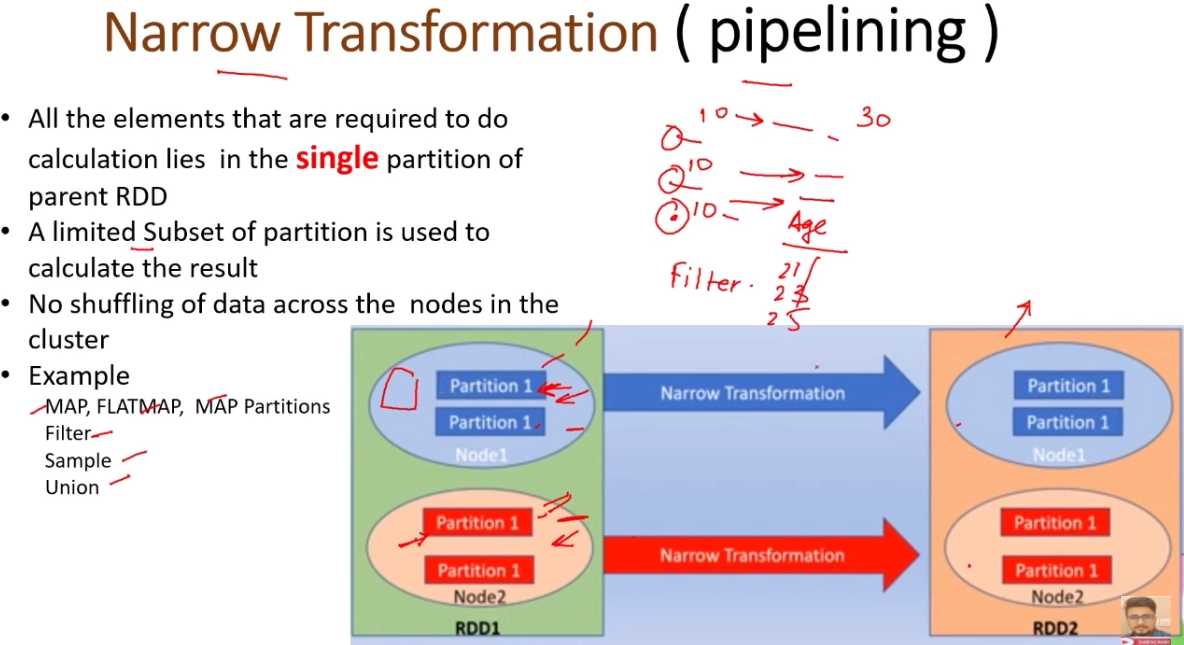

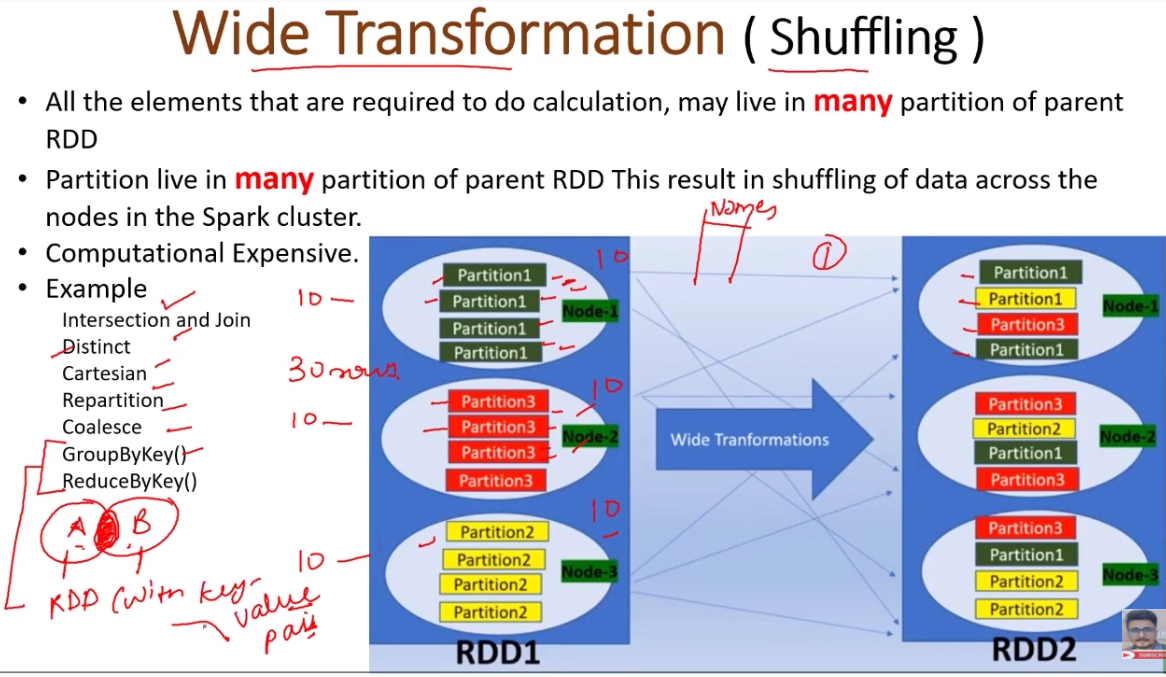

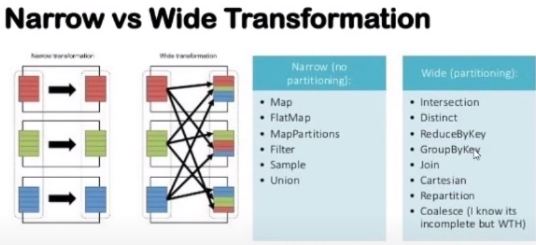

map : mengubah jd bentuk lain dan menghslkan RDD yg baru

In [ ]:
hit = sc.parallelize([1,2,3,3,4,5,6])

In [ ]:
hit.map(lambda x: x*2).collect()

[2, 4, 6, 6, 8, 10, 12]

In [ ]:
hit.map(lambda x: pow(x,2)).collect()

[1, 4, 9, 9, 16, 25, 36]

In [ ]:
nama = sc.parallelize(['adam','budi','tono','tini'])

In [ ]:
nama.map(lambda x: "Tuan "+x).collect()

['Tuan adam', 'Tuan budi', 'Tuan tono', 'Tuan tini']


pd map jumlah partisi input & ouput itu sama, sedangkan flatMap input < output

In [ ]:
fm = sc.parallelize([3,4,5])
fm.collect()

[3, 4, 5]

In [ ]:
tamp = range(1,3)
for i in tamp:
  print(i)

1
2


In [ ]:
(fm.flatMap(lambda x: range(1,x)).collect())

[1, 2, 1, 2, 3, 1, 2, 3, 4]

range(1,3) => 1,2

range(1,4) => 1,2,3

range(1,5) => 1,2,3,4,5

disatukan jd sprti kode diatas

In [ ]:
fm2 = sc.parallelize([1,2,3])
b = fm2.flatMap(lambda x: (x,x*10, 55))
b.collect()

[1, 10, 55, 2, 20, 55, 3, 30, 55]

filter : menyeleksi dari data berdasarkan syarat/kondisi/kriteria tertentu

In [ ]:
fil = sc.parallelize([1,2,3,4,5,6,7,8,9,10])
fil.collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
fil.filter(lambda x: x %2 == 0).collect()

[2, 4, 6, 8, 10]

filter semua data nama yg berawal a

In [ ]:
nama.filter(lambda x: "a" in x).collect()

['adam']

union : kombinasikan(gabungkan) semua data jadi satu



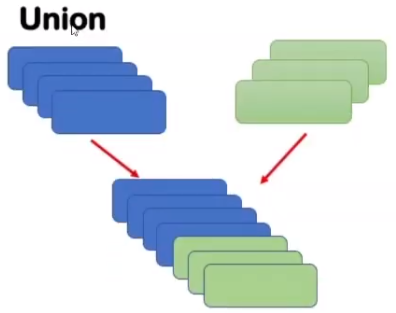

In [ ]:
fm.collect()

[3, 4, 5]

In [ ]:
fm2.collect()

[1, 2, 3]

In [ ]:
uni = sc.parallelize([1,2])
uni.union(fm).collect()

[1, 2, 3, 4, 5]

In [ ]:
fm.union(fm2).collect()

[3, 4, 5, 1, 2, 3]

In [ ]:
x = sc.parallelize([1,2,3],2)
y = sc.parallelize([4,5],1)

In [ ]:
w = x.union(y)
w.collect()

[1, 2, 3, 4, 5]

sample : mengembalikan subset sample RDD scra random 


In [ ]:
sam = fil
sam.collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
sam.sample(True, .2).collect()

[2, 5, 6]

In [ ]:
sam.sample(True, .2, seed=19).collect()

[2, 4, 6, 9]

wide transformation

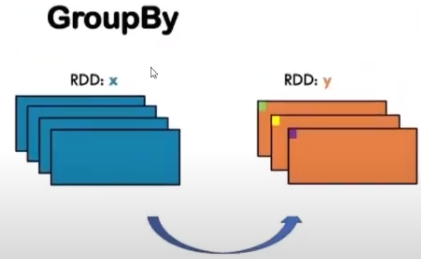

In [ ]:
nama = sc.parallelize(['adam','budi','badi','caca','cucu'])

In [ ]:
namaGrup = nama.groupBy(lambda x: x[0])
namaGrup.collect()

[('a', <pyspark.resultiterable.ResultIterable at 0x7f15f8814c10>),
 ('b', <pyspark.resultiterable.ResultIterable at 0x7f15f87cc990>),
 ('c', <pyspark.resultiterable.ResultIterable at 0x7f15f87ccd90>)]

In [ ]:
for (key,value) in namaGrup.collect():
  print(key, list(value))

a ['adam']
b ['budi', 'badi']
c ['caca', 'cucu']


In [ ]:
ang = fm.union(fm2)
ang.collect()

[3, 4, 5, 1, 2, 3]

In [ ]:
hsl = ang.groupBy(lambda x: x%2).collect()

In [ ]:
for (key,value) in hsl:
  print(key,list(value))

0 [4, 2]
1 [3, 5, 1, 3]


intersection 



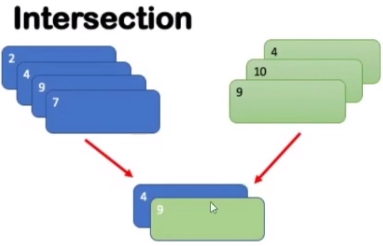

In [ ]:
num = sc.parallelize([2,4,9,7])
num2 = sc.parallelize([4,10,9])

In [ ]:
num.collect()

[2, 4, 9, 7]

In [ ]:
num2.collect()

[4, 10, 9]

In [ ]:
num.intersection(num2).collect()

[4, 9]

In [ ]:
num2.intersection(num).collect()

[4, 9]

In [ ]:
num2.subtract(num).collect()

[10]

In [ ]:
num.subtract(num2).collect()

[2, 7]

distinct : mencari nilai yg unik

In [ ]:
unik = sc.parallelize([1,2,3,2,2,4,5,5,1,3])

In [ ]:
unik.distinct().collect()

[1, 2, 3, 4, 5]

In [ ]:
sc.stop()

# part 2

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark

In [ ]:
from pyspark import SparkContext
sc = SparkContext('local','bagian 4')

kita buat (key,value)

In [ ]:
data = sc.parallelize([(1,2),(3,4),(5,6),(5,7),(1,9),(3,4)])
data.collect()

[(1, 2), (3, 4), (5, 6), (5, 7), (1, 9), (3, 4)]

In [ ]:
type(data)

pyspark.rdd.RDD

In [ ]:
data.count()

6

In [ ]:
data.countByValue()

defaultdict(int, {(1, 2): 1, (1, 9): 1, (3, 4): 2, (5, 6): 1, (5, 7): 1})

In [ ]:
data.countByKey()

defaultdict(int, {1: 2, 3: 2, 5: 2})

In [ ]:
data.top(2)

[(5, 7), (5, 6)]

In [ ]:
data.sortByKey().collect()

[(1, 2), (1, 9), (3, 4), (3, 4), (5, 6), (5, 7)]

In [ ]:
data.lookup(3)

[4, 4]

In [ ]:
data.lookup(1)

[2, 9]

In [ ]:
data.collect()

[(1, 2), (3, 4), (5, 6), (5, 7), (1, 9), (3, 4)]

In [ ]:
data.keys().collect()

[1, 3, 5, 5, 1, 3]

In [ ]:
data.values().collect()

[2, 4, 6, 7, 9, 4]

In [ ]:
data.mapValues(lambda x: x*2).collect()

[(1, 4), (3, 8), (5, 12), (5, 14), (1, 18), (3, 8)]

data.reduce() dan data.map() tidak menggunakan key value

In [ ]:
dataNama = sc.parallelize([(1,'adam'),(2,"budi"),(3,"tono")])
dataNama.collect()

[(1, 'adam'), (2, 'budi'), (3, 'tono')]

In [ ]:
dataNama.count()

3

In [ ]:
dataNama.countByKey()

defaultdict(int, {1: 1, 2: 1, 3: 1})

In [ ]:
dataNama.countByValue()

defaultdict(int, {(1, 'adam'): 1, (2, 'budi'): 1, (3, 'tono'): 1})

In [ ]:
dataNama.top(2)

[(3, 'tono'), (2, 'budi')]

reduceByKey


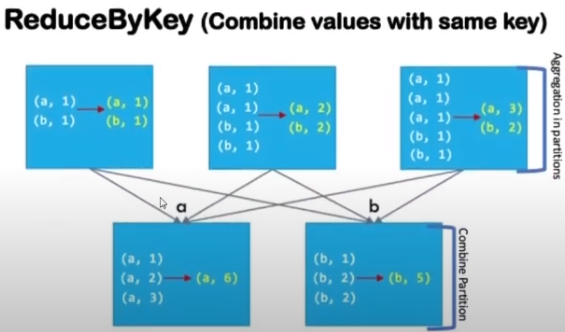

In [ ]:
data.collect()

[(1, 2), (3, 4), (5, 6), (5, 7), (1, 9), (3, 4)]

In [ ]:
data.reduceByKey(lambda x,y: x+y).collect()

[(1, 11), (3, 8), (5, 13)]

In [ ]:
data.reduceByKey(max).collect()

[(1, 9), (3, 4), (5, 7)]

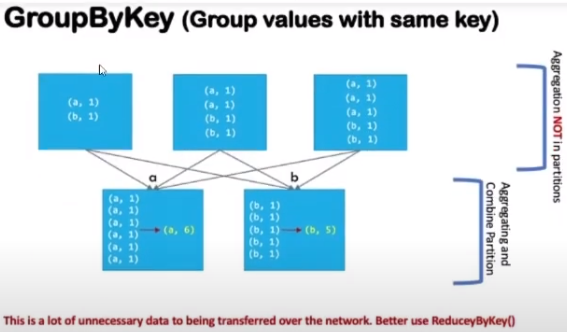

transformasi semua row dg key yg sama jd 1 row

In [ ]:
data.collect()

[(1, 2), (3, 4), (5, 6), (5, 7), (1, 9), (3, 4)]

In [ ]:
result = data.groupByKey().collect()
result

[(1, <pyspark.resultiterable.ResultIterable at 0x7f15f8985910>),
 (3, <pyspark.resultiterable.ResultIterable at 0x7f15f8985f90>),
 (5, <pyspark.resultiterable.ResultIterable at 0x7f15f8985cd0>)]

In [ ]:
for (key, value) in result:
  print(key, list(value))

1 [2, 9]
3 [4, 4]
5 [6, 7]


In [ ]:
data.groupByKey().mapValues(sum).collect()

[(1, 11), (3, 8), (5, 13)]

In [ ]:
data.groupByKey().mapValues(max).collect()

[(1, 9), (3, 4), (5, 7)]

In [ ]:
data.flatMapValues(lambda x:range(1,x)).collect()

[(1, 1),
 (3, 1),
 (3, 2),
 (3, 3),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (3, 1),
 (3, 2),
 (3, 3)]

In [ ]:
data2 = sc.parallelize([(2,2),(3,3)])

In [ ]:
data2.flatMapValues(lambda x:range(1,x)).collect()

[(2, 1), (3, 1), (3, 2)]

In [ ]:
data.collect()

[(1, 2), (3, 4), (5, 6), (5, 7), (1, 9), (3, 4)]

In [ ]:
data2.collect()

[(2, 2), (3, 3)]

In [ ]:
data.subtractByKey(data2).collect()

[(1, 2), (1, 9), (5, 6), (5, 7)]

In [ ]:
data2.subtractByKey(data).collect()

[(2, 2)]

join.

join sprti di sql



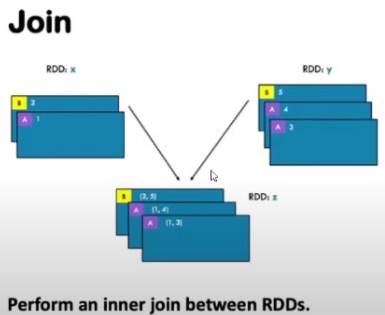

yg di join adlh RDD sedangkan SQL adlh tabel

In [ ]:
data.collect()

[(1, 2), (3, 4), (5, 6), (5, 7), (1, 9), (3, 4)]

In [ ]:
data2.collect()

[(2, 2), (3, 3)]

In [ ]:
data.join(data2).collect()

[(3, (4, 3)), (3, (4, 3))]

In [ ]:
data.rightOuterJoin(data2).collect()

[(2, (None, 2)), (3, (4, 3)), (3, (4, 3))]

In [ ]:
data2.rightOuterJoin(data).collect()

[(3, (3, 4)),
 (3, (3, 4)),
 (1, (None, 2)),
 (1, (None, 9)),
 (5, (None, 6)),
 (5, (None, 7))]

In [ ]:
data.leftOuterJoin(data2).collect()

[(1, (2, None)),
 (1, (9, None)),
 (3, (4, 3)),
 (3, (4, 3)),
 (5, (6, None)),
 (5, (7, None))]

In [ ]:
data2.leftOuterJoin(data).collect()

[(2, (2, None)), (3, (3, 4)), (3, (3, 4))]

In [ ]:
sc.stop()

# spark api
SPARK API/ SPARK INTERFACE API terdiri dr 3 unsuer yaitu dataset, RDD, dataframe. lihat gambar dibawah

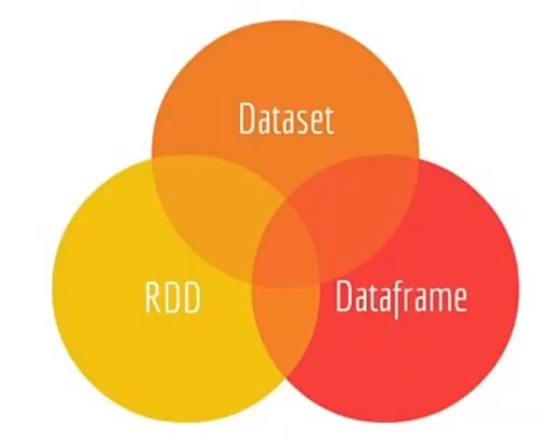

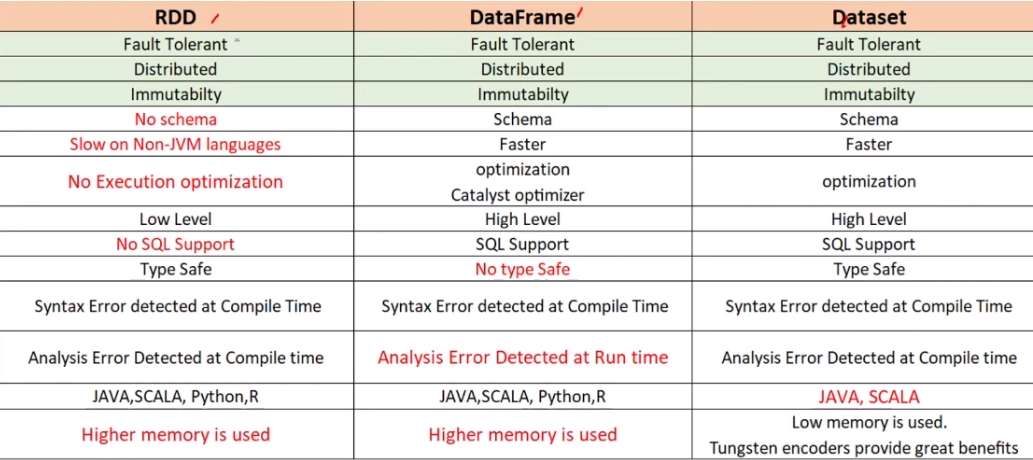

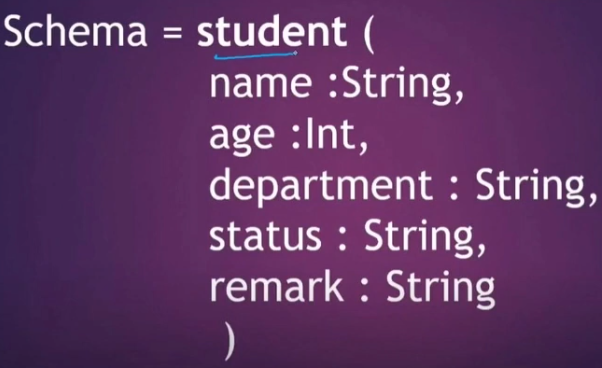

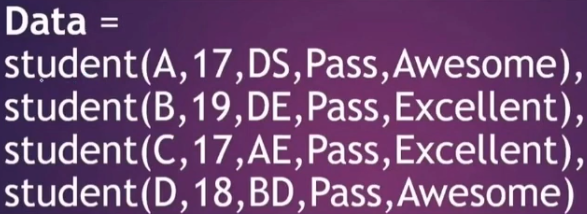

perbandingan kecepatan




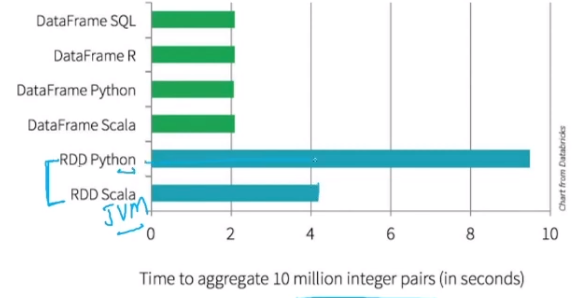

# dataframe

DataFrame spark

dataframe => SparkSession

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark

In [ ]:
from pyspark import SparkContext
sc = SparkContext("local",'bagian 6')

In [ ]:
# !wget https://drive.google.com/file/d/1fWSjiccaRJ5wcINd4STBJADbI5uBLxry/view?usp=sharing
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1fWSjiccaRJ5wcINd4STBJADbI5uBLxry' -O books.csv

--2021-08-30 13:34:24--  https://docs.google.com/uc?export=download&id=1fWSjiccaRJ5wcINd4STBJADbI5uBLxry
Resolving docs.google.com (docs.google.com)... 64.233.170.139, 64.233.170.138, 64.233.170.100, ...
Connecting to docs.google.com (docs.google.com)|64.233.170.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-20-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ulnbf29601g79t4vkhrfoinsc79m2cjp/1630330425000/10923847388243494811/*/1fWSjiccaRJ5wcINd4STBJADbI5uBLxry?e=download [following]
--2021-08-30 13:34:27--  https://doc-10-20-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ulnbf29601g79t4vkhrfoinsc79m2cjp/1630330425000/10923847388243494811/*/1fWSjiccaRJ5wcINd4STBJADbI5uBLxry?e=download
Resolving doc-10-20-docs.googleusercontent.com (doc-10-20-docs.googleusercontent.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connecting to doc-10-20-docs.googleusercontent.com (doc-10-20-

In [ ]:
data = sc.textFile('/content/books.csv')

In [ ]:
type(data)

pyspark.rdd.RDD

In [ ]:
data.top(1)

['id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url']

In [ ]:
data.collect()

['id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url',
 '1,2767052,2767052,2792775,272,439023483,9.78043902348e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m/2767052.jpg,https://images.gr-assets.com/books/1447303603s/2767052.jpg',
 '2,3,3,4640799,491,439554934,9.78043955493e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher\'s Stone,"Harry Potter and the Sorcerer\'s Stone (Harry Potter, #1)",eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m/3.jpg,https://images.gr-assets.com/books/1474154022s/3.jpg',
 '3,41865,41865,3212258,226,316

In [ ]:
data.take(2)

['id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url',
 '1,2767052,2767052,2792775,272,439023483,9.78043902348e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m/2767052.jpg,https://images.gr-assets.com/books/1447303603s/2767052.jpg']

In [ ]:
for line in data.take(5):
  print(line)

id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
1,2767052,2767052,2792775,272,439023483,9.78043902348e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m/2767052.jpg,https://images.gr-assets.com/books/1447303603s/2767052.jpg
2,3,3,4640799,491,439554934,9.78043955493e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m/3.jpg,https://images.gr-assets.com/books/1474154022s/3.jpg
3,41865,41865,3212258,226,316015849,9.7803160

In [ ]:
data.first()

'id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url'

In [ ]:
oneRecord = data.first()
columns = oneRecord.split(',')
columns

['id',
 'book_id',
 'best_book_id',
 'work_id',
 'books_count',
 'isbn',
 'isbn13',
 'authors',
 'original_publication_year',
 'original_title',
 'title',
 'language_code',
 'average_rating',
 'ratings_count',
 'work_ratings_count',
 'work_text_reviews_count',
 'ratings_1',
 'ratings_2',
 'ratings_3',
 'ratings_4',
 'ratings_5',
 'image_url',
 'small_image_url']

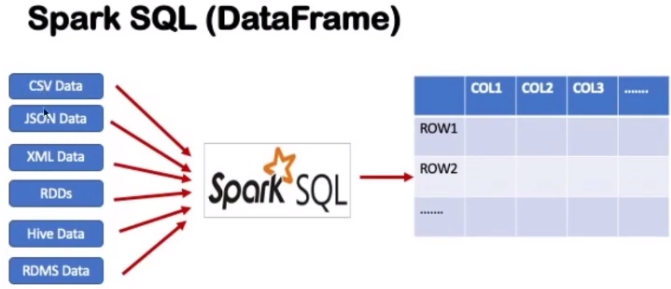

RDD hanya membaca kumpulan record pd partisi. 

Spark Dataframe API (spark sql).

SparkSession adlh unified entry point of any spark application spark

In [ ]:
import pyspark as ps
spark = ps.sql.SparkSession.builder.master("local").appName("dataframe - sql spark").getOrCreate()

In [ ]:
type(spark)

pyspark.sql.session.SparkSession

In [ ]:
# inferSchema=True untuk auto infer dataset as per data given as ALS needs only number
dfBook = spark.read.csv('/content/books.csv', header=True, inferSchema=True)

# lihat detail col(schema) 
dfBook.printSchema()

root
 |-- id: integer (nullable = true)
 |-- book_id: integer (nullable = true)
 |-- best_book_id: integer (nullable = true)
 |-- work_id: integer (nullable = true)
 |-- books_count: integer (nullable = true)
 |-- isbn: string (nullable = true)
 |-- isbn13: double (nullable = true)
 |-- authors: string (nullable = true)
 |-- original_publication_year: double (nullable = true)
 |-- original_title: string (nullable = true)
 |-- title: string (nullable = true)
 |-- language_code: string (nullable = true)
 |-- average_rating: string (nullable = true)
 |-- ratings_count: string (nullable = true)
 |-- work_ratings_count: string (nullable = true)
 |-- work_text_reviews_count: string (nullable = true)
 |-- ratings_1: double (nullable = true)
 |-- ratings_2: integer (nullable = true)
 |-- ratings_3: integer (nullable = true)
 |-- ratings_4: integer (nullable = true)
 |-- ratings_5: integer (nullable = true)
 |-- image_url: string (nullable = true)
 |-- small_image_url: string (nullable = true)


In [ ]:
type(dfBook)

pyspark.sql.dataframe.DataFrame

In [ ]:
len(dfBook.columns)

23

In [ ]:
# https://drive.google.com/file/d/1dNsyQiBTwqGqQnVb6LH_teRduVfde9dc/view?usp=sharing
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1dNsyQiBTwqGqQnVb6LH_teRduVfde9dc' -O ratings.csv

--2021-08-30 13:37:32--  https://docs.google.com/uc?export=download&id=1dNsyQiBTwqGqQnVb6LH_teRduVfde9dc
Resolving docs.google.com (docs.google.com)... 64.233.170.113, 64.233.170.139, 64.233.170.138, ...
Connecting to docs.google.com (docs.google.com)|64.233.170.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-20-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l0liqettlmj9258lug80o5cqnlg7vdh8/1630330650000/10923847388243494811/*/1dNsyQiBTwqGqQnVb6LH_teRduVfde9dc?e=download [following]
--2021-08-30 13:37:33--  https://doc-14-20-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l0liqettlmj9258lug80o5cqnlg7vdh8/1630330650000/10923847388243494811/*/1dNsyQiBTwqGqQnVb6LH_teRduVfde9dc?e=download
Resolving doc-14-20-docs.googleusercontent.com (doc-14-20-docs.googleusercontent.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connecting to doc-14-20-docs.googleusercontent.com (doc-14-20-

In [ ]:
rating = spark.read.csv('/content/ratings.csv', header=True, inferSchema=True)
type(rating)

pyspark.sql.dataframe.DataFrame

In [ ]:
rating.count()

981756

In [ ]:
rating.printSchema()

root
 |-- book_id: integer (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- rating: integer (nullable = true)



In [ ]:
rating.first()

Row(book_id=1, user_id=314, rating=5)

In [ ]:
rating.show(5)

+-------+-------+------+
|book_id|user_id|rating|
+-------+-------+------+
|      1|    314|     5|
|      1|    439|     3|
|      1|    588|     5|
|      1|   1169|     4|
|      1|   1185|     4|
+-------+-------+------+
only showing top 5 rows



In [ ]:
rating.head(5)

[Row(book_id=1, user_id=314, rating=5),
 Row(book_id=1, user_id=439, rating=3),
 Row(book_id=1, user_id=588, rating=5),
 Row(book_id=1, user_id=1169, rating=4),
 Row(book_id=1, user_id=1185, rating=4)]

In [ ]:
# di sql select field1, field2 from tabel1 limit 5
rating.select('book_id','rating').show(5)

+-------+------+
|book_id|rating|
+-------+------+
|      1|     5|
|      1|     3|
|      1|     5|
|      1|     4|
|      1|     4|
+-------+------+
only showing top 5 rows



In [ ]:
# select * from rating where rating <= 3;
rating.filter('rating <= 3').show(5)

+-------+-------+------+
|book_id|user_id|rating|
+-------+-------+------+
|      1|    439|     3|
|      1|   5461|     3|
|      1|   7563|     3|
|      1|   9246|     1|
|      1|  20076|     3|
+-------+-------+------+
only showing top 5 rows



In [ ]:
# select book_id, rating from rating where rating <= 3;
rating.select('book_id','rating').filter('rating <= 3').show(5)

+-------+------+
|book_id|rating|
+-------+------+
|      1|     3|
|      1|     3|
|      1|     3|
|      1|     1|
|      1|     3|
+-------+------+
only showing top 5 rows



In [ ]:
rating.count()

981756

In [ ]:
unik_user_count = rating.select('user_id').distinct().count()
unik_user_count

53424

In [ ]:
rating.filter('rating <= 3').count()

331429

In [ ]:
rating.describe('book_id').show(5)

+-------+-----------------+
|summary|          book_id|
+-------+-----------------+
|  count|           981756|
|   mean|4943.275635697668|
| stddev|2873.207414896197|
|    min|                1|
|    max|            10000|
+-------+-----------------+



In [ ]:
rating.describe('book_id','rating').show(5)

+-------+-----------------+------------------+
|summary|          book_id|            rating|
+-------+-----------------+------------------+
|  count|           981756|            981756|
|   mean|4943.275635697668|3.8565335989797873|
| stddev|2873.207414896197|0.9839408559620116|
|    min|                1|                 1|
|    max|            10000|                 5|
+-------+-----------------+------------------+



In [ ]:
hpsduplikat = rating.dropDuplicates()
hpsduplikat.count()

980112

In [ ]:
rating_tanpa_null = rating.dropna().count()
rating_tanpa_null

981756

In [ ]:
#hapus semua row yg berisi NaN/null dan hitung
rating.dropna('any').count()

981756

In [ ]:
# hal diatas bisa juga sprti brkt
rating.dropna('all').count()

981756

In [ ]:
# nilai maks dr kolom rating
rating.agg({'rating':'max'}).show()

+-----------+
|max(rating)|
+-----------+
|          5|
+-----------+



In [ ]:
rating.groupby('rating').count().toPandas()

rating   count
0       1   19575
1       3  248623
2       5  292961
3       4  357366
4       2   63231

In [ ]:
rating.groupby('rating').count().show()

+------+------+
|rating| count|
+------+------+
|     1| 19575|
|     3|248623|
|     5|292961|
|     4|357366|
|     2| 63231|
+------+------+



In [ ]:
# join
rating.join(dfBook, dfBook.book_id == rating.book_id).select('user_id','title').show(5)

+-------+--------------------+
|user_id|               title|
+-------+--------------------+
|    314|Harry Potter and ...|
|    439|Harry Potter and ...|
|    588|Harry Potter and ...|
|   1169|Harry Potter and ...|
|   1185|Harry Potter and ...|
+-------+--------------------+
only showing top 5 rows



In [ ]:
# select * from rating ORDER BY rating limit 5;
rating.orderBy('rating').show(5)

+-------+-------+------+
|book_id|user_id|rating|
+-------+-------+------+
|      2|  13794|     1|
|      3|   9246|     1|
|      2|  17643|     1|
|      1|  51480|     1|
|      2|  48687|     1|
+-------+-------+------+
only showing top 5 rows



In [ ]:
rating.orderBy(rating.rating.desc()).show(5)

+-------+-------+------+
|book_id|user_id|rating|
+-------+-------+------+
|      1|    314|     5|
|      1|    588|     5|
|      1|   5885|     5|
|      1|   2900|     5|
|      1|   3922|     5|
+-------+-------+------+
only showing top 5 rows



In [ ]:
rating.orderBy('rating','book_id').show(5)

+-------+-------+------+
|book_id|user_id|rating|
+-------+-------+------+
|      1|  51480|     1|
|      1|   9246|     1|
|      2|  17643|     1|
|      2|   6063|     1|
|      2|  13794|     1|
+-------+-------+------+
only showing top 5 rows



In [ ]:
# ubah nilai dari kolom rating jd 10 kali lipat dari semula,misal 5 jd 50
rating.withColumn('rating',rating.rating*10).show(5)

+-------+-------+------+
|book_id|user_id|rating|
+-------+-------+------+
|      1|    314|    50|
|      1|    439|    30|
|      1|    588|    50|
|      1|   1169|    40|
|      1|   1185|    40|
+-------+-------+------+
only showing top 5 rows



In [ ]:
# menambah kolom baru yg bernama rating_ten
newCol = rating.withColumn('rating_ten',rating.rating*10)
newCol.show(5)

+-------+-------+------+----------+
|book_id|user_id|rating|rating_ten|
+-------+-------+------+----------+
|      1|    314|     5|        50|
|      1|    439|     3|        30|
|      1|    588|     5|        50|
|      1|   1169|     4|        40|
|      1|   1185|     4|        40|
+-------+-------+------+----------+
only showing top 5 rows



In [ ]:
# hapus kolom. kita hapus kolom rating_ten
rating.drop('rating_ten').show(5)

+-------+-------+------+
|book_id|user_id|rating|
+-------+-------+------+
|      1|    314|     5|
|      1|    439|     3|
|      1|    588|     5|
|      1|   1169|     4|
|      1|   1185|     4|
+-------+-------+------+
only showing top 5 rows



In [ ]:
rating.show()

+-------+-------+------+
|book_id|user_id|rating|
+-------+-------+------+
|      1|    314|     5|
|      1|    439|     3|
|      1|    588|     5|
|      1|   1169|     4|
|      1|   1185|     4|
|      1|   2077|     4|
|      1|   2487|     4|
|      1|   2900|     5|
|      1|   3662|     4|
|      1|   3922|     5|
|      1|   5379|     5|
|      1|   5461|     3|
|      1|   5885|     5|
|      1|   6630|     5|
|      1|   7563|     3|
|      1|   9246|     1|
|      1|  10140|     4|
|      1|  10146|     5|
|      1|  10246|     4|
|      1|  10335|     4|
+-------+-------+------+
only showing top 20 rows



In [ ]:
sc.stop()